# Question 1

In [41]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


In [42]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Splitting Dataset

In [43]:
n_samples = t_u.shape[0]
n_val = int (0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices [:-n_val]
val_indices = shuffled_indices[-n_val:]



In [44]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

non linear system


In [45]:
def nonLinearModel (t_u, w2, w1, b):
 return w2*t_u**2 + w1*t_u + b

In [46]:
def loss(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

1a. Non Linear Training Loop

In [47]:
def nonLinearTrainingLoop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range (1, n_epochs + 1):
    train_t_p = nonLinearModel(train_t_u, *params)
    train_loss = loss(train_t_p, train_t_c)

    val_t_p = nonLinearModel(val_t_u, *params)
    val_loss = loss(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')
  return params



1b. SGD

Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

In [48]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)
print('Learning rate of 0.1')
nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)

Learning rate of 0.1
Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan



tensor([nan, nan, nan], requires_grad=True)

In [49]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
print('Learning rate of 0.01')
nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)

Learning rate of 0.01
Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan



tensor([nan, nan, nan], requires_grad=True)

In [50]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)
print('Learning rate of 0.001')
nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)

Learning rate of 0.001
Epochs: 500, 	Training Loss: 4.003821, 	Validation Loss: 5.679838

Epochs: 1000, 	Training Loss: 2.792105, 	Validation Loss: 10.447968

Epochs: 1500, 	Training Loss: 2.578365, 	Validation Loss: 14.709350

Epochs: 2000, 	Training Loss: 2.536735, 	Validation Loss: 16.792400

Epochs: 2500, 	Training Loss: 2.524850, 	Validation Loss: 17.636789

Epochs: 3000, 	Training Loss: 2.518169, 	Validation Loss: 17.911884

Epochs: 3500, 	Training Loss: 2.512462, 	Validation Loss: 17.942642

Epochs: 4000, 	Training Loss: 2.506994, 	Validation Loss: 17.871819

Epochs: 4500, 	Training Loss: 2.501642, 	Validation Loss: 17.759750

Epochs: 5000, 	Training Loss: 2.496380, 	Validation Loss: 17.631500



tensor([ 0.7348, -1.6650, -1.8140], requires_grad=True)

In [51]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)
print('Learning rate of 0.0001')

nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)


Learning rate of 0.0001
Epochs: 500, 	Training Loss: 9.619906, 	Validation Loss: 21.230251

Epochs: 1000, 	Training Loss: 8.480709, 	Validation Loss: 16.598782

Epochs: 1500, 	Training Loss: 7.524939, 	Validation Loss: 13.072224

Epochs: 2000, 	Training Loss: 6.723053, 	Validation Loss: 10.442045

Epochs: 2500, 	Training Loss: 6.050251, 	Validation Loss: 8.535880

Epochs: 3000, 	Training Loss: 5.485742, 	Validation Loss: 7.211503

Epochs: 3500, 	Training Loss: 5.012081, 	Validation Loss: 6.351753

Epochs: 4000, 	Training Loss: 4.614630, 	Validation Loss: 5.860335

Epochs: 4500, 	Training Loss: 4.281113, 	Validation Loss: 5.658264

Epochs: 5000, 	Training Loss: 4.001230, 	Validation Loss: 5.680965



tensor([ 0.5412, -0.7204, -0.8384], requires_grad=True)

1b. ADAM

Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

In [52]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)
print('Learning rate of 0.1')

nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)


Learning rate of 0.1
Epochs: 500, 	Training Loss: 2.287335, 	Validation Loss: 11.645745

Epochs: 1000, 	Training Loss: 2.256364, 	Validation Loss: 10.535938

Epochs: 1500, 	Training Loss: 2.225581, 	Validation Loss: 9.096406

Epochs: 2000, 	Training Loss: 2.201704, 	Validation Loss: 7.732929

Epochs: 2500, 	Training Loss: 2.187115, 	Validation Loss: 6.613074

Epochs: 3000, 	Training Loss: 2.180295, 	Validation Loss: 5.811468

Epochs: 3500, 	Training Loss: 2.177985, 	Validation Loss: 5.317996

Epochs: 4000, 	Training Loss: 2.177460, 	Validation Loss: 5.065342

Epochs: 4500, 	Training Loss: 2.177388, 	Validation Loss: 4.963517

Epochs: 5000, 	Training Loss: 2.177382, 	Validation Loss: 4.933678



tensor([ 0.4540,  0.9639, -7.4672], requires_grad=True)

In [53]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)
print('Learning rate of 0.01')

nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)


Learning rate of 0.01
Epochs: 500, 	Training Loss: 5.876269, 	Validation Loss: 8.731654

Epochs: 1000, 	Training Loss: 3.982460, 	Validation Loss: 4.956769

Epochs: 1500, 	Training Loss: 2.848088, 	Validation Loss: 5.532434

Epochs: 2000, 	Training Loss: 2.416810, 	Validation Loss: 8.338858

Epochs: 2500, 	Training Loss: 2.312652, 	Validation Loss: 10.646044

Epochs: 3000, 	Training Loss: 2.294047, 	Validation Loss: 11.608155

Epochs: 3500, 	Training Loss: 2.286491, 	Validation Loss: 11.691045

Epochs: 4000, 	Training Loss: 2.278378, 	Validation Loss: 11.431181

Epochs: 4500, 	Training Loss: 2.268816, 	Validation Loss: 11.048252

Epochs: 5000, 	Training Loss: 2.257824, 	Validation Loss: 10.585447



tensor([ 0.5991, -0.3751, -4.6562], requires_grad=True)

In [54]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)
print('Learning rate of 0.001')

nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)


Learning rate of 0.001
Epochs: 500, 	Training Loss: 86.714554, 	Validation Loss: 176.504578

Epochs: 1000, 	Training Loss: 11.437991, 	Validation Loss: 16.995047

Epochs: 1500, 	Training Loss: 7.197553, 	Validation Loss: 12.007837

Epochs: 2000, 	Training Loss: 6.944690, 	Validation Loss: 11.839658

Epochs: 2500, 	Training Loss: 6.690705, 	Validation Loss: 11.076097

Epochs: 3000, 	Training Loss: 6.380027, 	Validation Loss: 10.144827

Epochs: 3500, 	Training Loss: 6.011671, 	Validation Loss: 9.094356

Epochs: 4000, 	Training Loss: 5.589190, 	Validation Loss: 7.973470

Epochs: 4500, 	Training Loss: 5.122446, 	Validation Loss: 6.861547

Epochs: 5000, 	Training Loss: 4.628743, 	Validation Loss: 5.869592



tensor([ 0.4428, -0.0087, -1.6871], requires_grad=True)

In [55]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr=learning_rate)
print('Learning rate of 0.0001')

nonLinearTrainingLoop(5000, optimizer, params,train_t_un, val_t_un, train_t_c, val_t_c)


Learning rate of 0.0001
Epochs: 500, 	Training Loss: 471.355530, 	Validation Loss: 1059.203491

Epochs: 1000, 	Training Loss: 401.162933, 	Validation Loss: 896.258301

Epochs: 1500, 	Training Loss: 338.674286, 	Validation Loss: 751.601562

Epochs: 2000, 	Training Loss: 283.181244, 	Validation Loss: 623.553162

Epochs: 2500, 	Training Loss: 234.106552, 	Validation Loss: 510.740997

Epochs: 3000, 	Training Loss: 190.975800, 	Validation Loss: 412.035004

Epochs: 3500, 	Training Loss: 153.393112, 	Validation Loss: 326.488373

Epochs: 4000, 	Training Loss: 121.015678, 	Validation Loss: 253.276428

Epochs: 4500, 	Training Loss: 93.532768, 	Validation Loss: 191.645645

Epochs: 5000, 	Training Loss: 70.644005, 	Validation Loss: 140.861404



tensor([ 0.5711,  0.5693, -0.4336], requires_grad=True)

1C Linear vs Non Linear

In [56]:
def linearModel (t_u, w, b):
 return w * t_u + b

In [57]:
def linearTrainingLoop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range (1, n_epochs + 1):
    train_t_p = linearModel(train_t_u, *params)
    train_loss = loss(train_t_p, train_t_c)

    val_t_p = linearModel(val_t_u, *params)
    val_loss = loss(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')
  return params


In [58]:
linearParams = torch.tensor([1.0, 0.0], requires_grad=True)
nonLinearParams = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)


In [59]:
linearOptimizer = optim.SGD([linearParams], lr= 0.01)
nonLinearOptimizer = optim.Adam([nonLinearParams], lr=0.0001)

In [60]:
linearTraining = linearTrainingLoop(5000, linearOptimizer, linearParams, train_t_un, val_t_un, train_t_c, val_t_c)




Epochs: 500, 	Training Loss: 7.375591, 	Validation Loss: 33.852039

Epochs: 1000, 	Training Loss: 4.119481, 	Validation Loss: 16.841705

Epochs: 1500, 	Training Loss: 3.238195, 	Validation Loss: 10.319435

Epochs: 2000, 	Training Loss: 2.999669, 	Validation Loss: 7.556142

Epochs: 2500, 	Training Loss: 2.935112, 	Validation Loss: 6.289048

Epochs: 3000, 	Training Loss: 2.917640, 	Validation Loss: 5.675973

Epochs: 3500, 	Training Loss: 2.912911, 	Validation Loss: 5.369515

Epochs: 4000, 	Training Loss: 2.911628, 	Validation Loss: 5.213466

Epochs: 4500, 	Training Loss: 2.911284, 	Validation Loss: 5.133206

Epochs: 5000, 	Training Loss: 2.911191, 	Validation Loss: 5.091695



In [61]:
nonLinearTraining = nonLinearTrainingLoop(5000, nonLinearOptimizer, nonLinearParams, train_t_un, val_t_un, train_t_c, val_t_c)


Epochs: 500, 	Training Loss: 471.355530, 	Validation Loss: 1059.203491

Epochs: 1000, 	Training Loss: 401.162933, 	Validation Loss: 896.258301

Epochs: 1500, 	Training Loss: 338.674286, 	Validation Loss: 751.601562

Epochs: 2000, 	Training Loss: 283.181244, 	Validation Loss: 623.553162

Epochs: 2500, 	Training Loss: 234.106552, 	Validation Loss: 510.740997

Epochs: 3000, 	Training Loss: 190.975800, 	Validation Loss: 412.035004

Epochs: 3500, 	Training Loss: 153.393112, 	Validation Loss: 326.488373

Epochs: 4000, 	Training Loss: 121.015678, 	Validation Loss: 253.276428

Epochs: 4500, 	Training Loss: 93.532768, 	Validation Loss: 191.645645

Epochs: 5000, 	Training Loss: 70.644005, 	Validation Loss: 140.861404



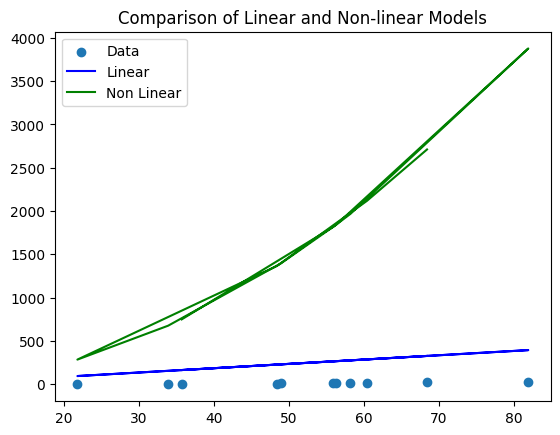

In [64]:
t_p_linear = linearModel(t_u, *linearParams).detach().numpy()
t_p_nonLinear = nonLinearModel(t_u, *nonLinearParams).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data')
plt.plot(t_u, t_p_linear, color = 'blue', label = 'Linear')
plt.plot(t_u, t_p_nonLinear, color = 'green', label = 'Non Linear')
plt.title('Comparison of Linear and Non-linear Models')
plt.legend()
plt.show()